In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


/root/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16).to("cuda")
pipe.unet.eval()

Fetching 20 files: 100%|██████████| 20/20 [00:00<00:00, 9581.51it/s]
/workspace/transformers/src/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0): Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (attn1): CrossAttention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_features=320, bias=False)
                (to_out): ModuleList(
                

# custom-diffusion

In [42]:
save_path = '/workspace/custom-diffusion/logs/cat_custom_diffusion/delta.bin'
st = torch.load(save_path)
print(st.keys())
# print(st['unet'].keys())
for k in st['unet'].keys():
    print(k)

dict_keys(['unet', 'modifier_token'])
down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.weight
down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_k.weight
down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_v.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k.weight
down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v.weight
down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k.weight
down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v.weight
down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_k.weight
down_blocks.2.attentions.0.transformer_blocks.0.attn2.to_v.weight
down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k.weight
down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v.weight
up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k.weight
up_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v.weight
up_blocks.1.attentions.1.transformer_block

In [43]:
# upblocks.2.attentions.1.transformerblocks.0.attn1.tov
v = pipe.unet.up_blocks[2].attentions[1].transformer_blocks[0].attn2.to_v.weight
cd_updated_v = st['unet']['up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v.weight']

In [44]:
print(v)
print(v.max().item(), v.min().item())
print(v.mean().item(), v.std().item())
print()
print(cd_updated_v)
print(cd_updated_v.max().item(), cd_updated_v.min().item())
print(cd_updated_v.mean().item(), cd_updated_v.std().item())

Parameter containing:
tensor([[-0.0178, -0.0281, -0.0224,  ...,  0.0391, -0.0014,  0.0187],
        [ 0.0433, -0.0433,  0.0025,  ...,  0.0304, -0.0111,  0.0375],
        [-0.0003,  0.0457,  0.0161,  ..., -0.0073, -0.0267, -0.0158],
        ...,
        [-0.0345,  0.0861, -0.1406,  ...,  0.0407, -0.0540, -0.0791],
        [-0.0704,  0.0098,  0.0769,  ...,  0.0155, -0.0111, -0.0144],
        [ 0.0598,  0.1011, -0.0524,  ..., -0.0055, -0.0349,  0.0331]],
       device='cuda:0', dtype=torch.float16, requires_grad=True)
0.2156982421875 -0.26708984375
-9.59634780883789e-05 0.03692626953125

tensor([[-0.0142, -0.0330, -0.0289,  ...,  0.0398, -0.0098,  0.0267],
        [ 0.0435, -0.0482, -0.0019,  ...,  0.0315, -0.0167,  0.0408],
        [-0.0003,  0.0528,  0.0226,  ..., -0.0131, -0.0195, -0.0210],
        ...,
        [-0.0371,  0.0852, -0.1412,  ...,  0.0433, -0.0572, -0.0812],
        [-0.0639,  0.0135,  0.0798,  ...,  0.0093, -0.0095, -0.0067],
        [ 0.0642,  0.1019, -0.0458,  ..., -0.

# cones only attn2 kvm

In [45]:
save_path = '/workspace/custom-diffusion/logs/cat_cones_attn2_only_reproduce/delta.bin'
st = torch.load(save_path)
print(st.keys())
print(st['unet'].keys())

v = pipe.unet.up_blocks[2].attentions[1].transformer_blocks[0].attn2.to_v.weight
xi = st['unet']['up_blocks.2.attentions.1.transformer_blocks.0.attn2.v_xi.weight']

dict_keys(['unet', 'modifier_token'])
dict_keys(['down_blocks.0.attentions.0.transformer_blocks.0.attn2.k_xi.weight', 'down_blocks.0.attentions.0.transformer_blocks.0.attn2.v_xi.weight', 'down_blocks.0.attentions.1.transformer_blocks.0.attn2.k_xi.weight', 'down_blocks.0.attentions.1.transformer_blocks.0.attn2.v_xi.weight', 'down_blocks.1.attentions.0.transformer_blocks.0.attn2.k_xi.weight', 'down_blocks.1.attentions.0.transformer_blocks.0.attn2.v_xi.weight', 'down_blocks.1.attentions.1.transformer_blocks.0.attn2.k_xi.weight', 'down_blocks.1.attentions.1.transformer_blocks.0.attn2.v_xi.weight', 'down_blocks.2.attentions.0.transformer_blocks.0.attn2.k_xi.weight', 'down_blocks.2.attentions.0.transformer_blocks.0.attn2.v_xi.weight', 'down_blocks.2.attentions.1.transformer_blocks.0.attn2.k_xi.weight', 'down_blocks.2.attentions.1.transformer_blocks.0.attn2.v_xi.weight', 'up_blocks.1.attentions.0.transformer_blocks.0.attn2.k_xi.weight', 'up_blocks.1.attentions.0.transformer_blocks.0.attn2.v_x

In [46]:
print(v)
print(xi)

Parameter containing:
tensor([[-0.0178, -0.0281, -0.0224,  ...,  0.0391, -0.0014,  0.0187],
        [ 0.0433, -0.0433,  0.0025,  ...,  0.0304, -0.0111,  0.0375],
        [-0.0003,  0.0457,  0.0161,  ..., -0.0073, -0.0267, -0.0158],
        ...,
        [-0.0345,  0.0861, -0.1406,  ...,  0.0407, -0.0540, -0.0791],
        [-0.0704,  0.0098,  0.0769,  ...,  0.0155, -0.0111, -0.0144],
        [ 0.0598,  0.1011, -0.0524,  ..., -0.0055, -0.0349,  0.0331]],
       device='cuda:0', dtype=torch.float16, requires_grad=True)
tensor([[1.0271, 1.0182, 1.0083,  ..., 1.0201, 1.0054, 1.0147],
        [0.9600, 1.0391, 0.9840,  ..., 1.0414, 1.0305, 1.0456],
        [0.9869, 1.0456, 1.0318,  ..., 1.0366, 0.9609, 1.0342],
        ...,
        [1.0177, 0.9861, 1.0150,  ..., 1.0170, 1.0145, 0.9804],
        [0.9976, 0.9967, 0.9934,  ..., 1.0016, 1.0025, 0.9885],
        [1.0121, 1.0240, 0.9745,  ..., 1.0127, 0.9776, 0.9655]],
       requires_grad=True)


In [61]:
cones_lr = 2e-5
cones_tau = 2500
# cones_tau = 5000
# cones_tau = 0.00005

m = ~(xi < (1 - cones_lr*cones_tau))

print(m.size())
print(m)
print(m.sum())
print((~m).sum())


print('masking', m.sum()/(m.numel())*100)
print('masking', (~m).sum()/(m.numel())*100)


torch.Size([640, 768])
tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])
tensor(488349)
tensor(3171)
masking tensor(99.3549)
masking tensor(0.6451)


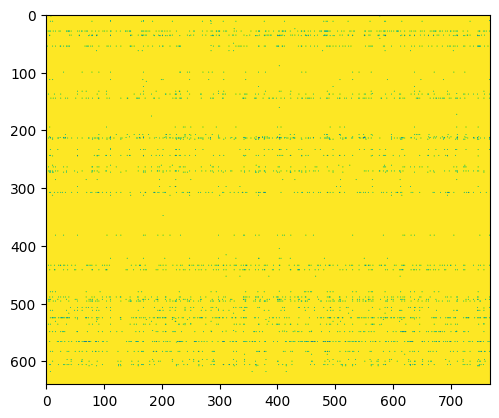

In [62]:
plt.imshow(m.cpu().detach().numpy())

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])


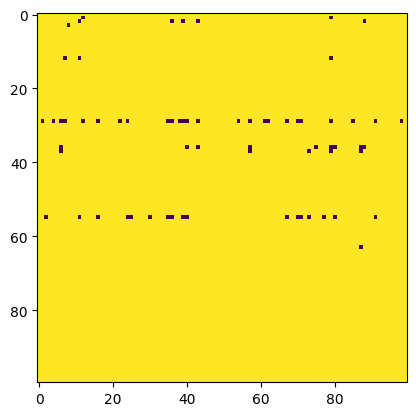

In [63]:
print(m)
plt.imshow(m[:100,:100].cpu().detach().numpy())

Parameter containing:
tensor([[-0.0178, -0.0281, -0.0224,  ...,  0.0391, -0.0014,  0.0187],
        [ 0.0433, -0.0433,  0.0025,  ...,  0.0304, -0.0111,  0.0375],
        [-0.0003,  0.0457,  0.0161,  ..., -0.0073, -0.0267, -0.0158],
        ...,
        [-0.0345,  0.0861, -0.1406,  ...,  0.0407, -0.0540, -0.0791],
        [-0.0704,  0.0098,  0.0769,  ...,  0.0155, -0.0111, -0.0144],
        [ 0.0598,  0.1011, -0.0524,  ..., -0.0055, -0.0349,  0.0331]],
       device='cuda:0', dtype=torch.float16, requires_grad=True)


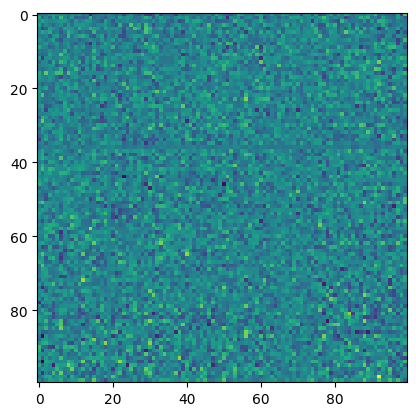

In [64]:
print(v)
plt.imshow(v[:100,:100].cpu().detach().numpy())

In [65]:
print('custom_diffusion',cd_updated_v)
print(cd_updated_v.max().item(), cd_updated_v.min().item())
print(cd_updated_v.mean().item(), cd_updated_v.std().item())
print()

cones_xi_applied_v = v * xi.type_as(v)
print('cones', cones_xi_applied_v)
print(cones_xi_applied_v.max().item(), cones_xi_applied_v.min().item())
print(cones_xi_applied_v.mean().item(), cones_xi_applied_v.std().item())

custom_diffusion tensor([[-0.0142, -0.0330, -0.0289,  ...,  0.0398, -0.0098,  0.0267],
        [ 0.0435, -0.0482, -0.0019,  ...,  0.0315, -0.0167,  0.0408],
        [-0.0003,  0.0528,  0.0226,  ..., -0.0131, -0.0195, -0.0210],
        ...,
        [-0.0371,  0.0852, -0.1412,  ...,  0.0433, -0.0572, -0.0812],
        [-0.0639,  0.0135,  0.0798,  ...,  0.0093, -0.0095, -0.0067],
        [ 0.0642,  0.1019, -0.0458,  ..., -0.0095, -0.0334,  0.0333]],
       requires_grad=True)
0.21550773084163666 -0.26321372389793396
-9.595692972652614e-05 0.03709563612937927

cones tensor([[-0.0182, -0.0286, -0.0226,  ...,  0.0399, -0.0014,  0.0189],
        [ 0.0415, -0.0450,  0.0024,  ...,  0.0317, -0.0114,  0.0392],
        [-0.0003,  0.0478,  0.0166,  ..., -0.0075, -0.0256, -0.0163],
        ...,
        [-0.0351,  0.0849, -0.1427,  ...,  0.0414, -0.0548, -0.0776],
        [-0.0702,  0.0097,  0.0764,  ...,  0.0155, -0.0111, -0.0143],
        [ 0.0605,  0.1035, -0.0511,  ..., -0.0056, -0.0341,  0.0319]

tensor([[-0.0178, -0.0281, -0.0224,  ...,  0.0391, -0.0014,  0.0187],
        [ 0.0000, -0.0433,  0.0025,  ...,  0.0304, -0.0111,  0.0375],
        [-0.0003,  0.0457,  0.0161,  ..., -0.0073, -0.0000, -0.0158],
        ...,
        [-0.0345,  0.0861, -0.1406,  ...,  0.0407, -0.0540, -0.0791],
        [-0.0704,  0.0098,  0.0769,  ...,  0.0155, -0.0111, -0.0144],
        [ 0.0598,  0.1011, -0.0000,  ..., -0.0055, -0.0000,  0.0000]],
       device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
sparsity :  87.01925659179688


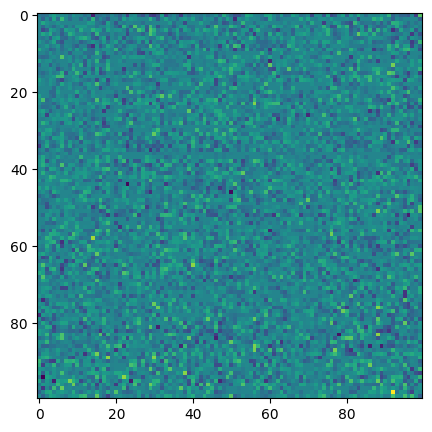

In [53]:
tmp = v * m.type_as(v)
print(tmp)
# plt.imshow(tmp[:100,:100].cpu().detach().numpy())
print('sparsity : ', ((tmp!=0).sum() / (tmp.numel()) * 100).item())

fig = plt.figure(figsize=(5,5))
plt.imshow(tmp[:100,:100].cpu().detach().numpy())

tensor([[-0.0182, -0.0286, -0.0226,  ...,  0.0399, -0.0014,  0.0189],
        [ 0.0000, -0.0450,  0.0024,  ...,  0.0317, -0.0114,  0.0392],
        [-0.0003,  0.0478,  0.0166,  ..., -0.0075, -0.0000, -0.0163],
        ...,
        [-0.0351,  0.0849, -0.1427,  ...,  0.0414, -0.0548, -0.0776],
        [-0.0702,  0.0097,  0.0764,  ...,  0.0155, -0.0111, -0.0143],
        [ 0.0605,  0.1035, -0.0000,  ..., -0.0056, -0.0000,  0.0000]],
       device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
sparsity :  87.01925659179688


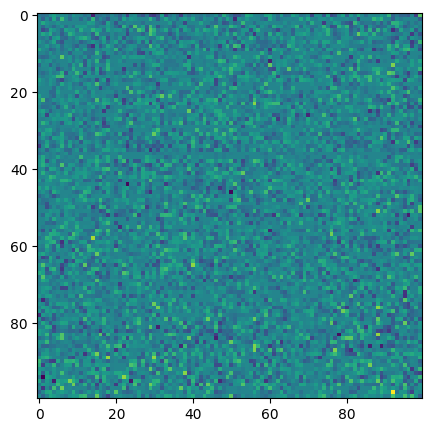

In [54]:
tmp = v * (xi.type_as(v)*m.type_as(v))
print(tmp)
# plt.imshow(tmp[:100,:100].cpu().detach().numpy())
print('sparsity : ', ((tmp!=0).sum() / (tmp.numel()) * 100).item())

fig = plt.figure(figsize=(5,5))
plt.imshow(tmp[:100,:100].cpu().detach().numpy())

# lora

In [18]:
save_path = '/workspace/custom-diffusion/logs/cat_lora_r8_alpha16/delta.bin'
st = torch.load(save_path)
print(st.keys())
# print(st['unet'].keys())
for k in st['unet'].keys():
    print(k)

dict_keys(['unet', 'modifier_token'])
down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k_lora_a
down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k_lora_b
down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v_lora_a
down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v_lora_b
down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_k_lora_a
down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_k_lora_b
down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_v_lora_a
down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_v_lora_b
down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k_lora_a
down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k_lora_b
down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v_lora_a
down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v_lora_b
down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k_lora_a
down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k_lora_b
down_blocks.1.attentions.1.transformer

In [19]:
# upblocks.2.attentions.1.transformerblocks.0.attn1.tov
v = pipe.unet.up_blocks[2].attentions[1].transformer_blocks[0].attn2.to_v.weight
v_lora_a = st['unet']['up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v_lora_a']
v_lora_b = st['unet']['up_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v_lora_b']

In [20]:
print(v.data)
print(v_lora_a)
print(v_lora_b)

tensor([[-0.0178, -0.0281, -0.0224,  ...,  0.0391, -0.0014,  0.0187],
        [ 0.0433, -0.0433,  0.0025,  ...,  0.0304, -0.0111,  0.0375],
        [-0.0003,  0.0457,  0.0161,  ..., -0.0073, -0.0267, -0.0158],
        ...,
        [-0.0345,  0.0861, -0.1406,  ...,  0.0407, -0.0540, -0.0791],
        [-0.0704,  0.0098,  0.0769,  ...,  0.0155, -0.0111, -0.0144],
        [ 0.0598,  0.1011, -0.0524,  ..., -0.0055, -0.0349,  0.0331]],
       device='cuda:0', dtype=torch.float16)
tensor([[-0.0859, -0.0199,  0.0030,  ...,  0.0013, -0.0394,  0.0357],
        [-0.0330, -0.0090,  0.0186,  ...,  0.0603, -0.0175, -0.0050],
        [-0.0071,  0.0019, -0.0139,  ...,  0.0012, -0.0419,  0.0080],
        ...,
        [ 0.0089,  0.0425, -0.0208,  ..., -0.0367,  0.0115,  0.0048],
        [-0.0455,  0.0154,  0.0008,  ...,  0.0573, -0.0398, -0.0045],
        [-0.0866, -0.0421,  0.0809,  ...,  0.1119, -0.0023, -0.0135]],
       requires_grad=True)
tensor([[ 0.0337,  0.0267,  0.0247,  ..., -0.0273,  0.0334, 

In [22]:
print(v.size())
print(v_lora_b.size())
print(v_lora_a.size())
print()


lora_alpha = 16
lora_r = 8
lora_scaling = lora_alpha / lora_r 
tmp = v.data + (v_lora_b @ v_lora_a).type_as(v.data) * lora_scaling
print(v.data)
print(tmp)

torch.Size([640, 768])
torch.Size([640, 8])
torch.Size([8, 768])

tensor([[-0.0178, -0.0281, -0.0224,  ...,  0.0391, -0.0014,  0.0187],
        [ 0.0433, -0.0433,  0.0025,  ...,  0.0304, -0.0111,  0.0375],
        [-0.0003,  0.0457,  0.0161,  ..., -0.0073, -0.0267, -0.0158],
        ...,
        [-0.0345,  0.0861, -0.1406,  ...,  0.0407, -0.0540, -0.0791],
        [-0.0704,  0.0098,  0.0769,  ...,  0.0155, -0.0111, -0.0144],
        [ 0.0598,  0.1011, -0.0524,  ..., -0.0055, -0.0349,  0.0331]],
       device='cuda:0', dtype=torch.float16)
tensor([[-0.0317, -0.0314, -0.0225,  ...,  0.0483, -0.0160,  0.0219],
        [ 0.0297, -0.0471,  0.0012,  ...,  0.0374, -0.0258,  0.0411],
        [ 0.0116,  0.0470,  0.0213,  ..., -0.0114, -0.0083, -0.0209],
        ...,
        [-0.0302,  0.0887, -0.1414,  ...,  0.0405, -0.0533, -0.0795],
        [-0.0576,  0.0161,  0.0721,  ...,  0.0090, -0.0079, -0.0151],
        [ 0.0698,  0.1028, -0.0493,  ..., -0.0104, -0.0205,  0.0295]],
       device='cuda:0